# DICpy: digital image correlation with Python

### Earthquake Engineering and Structural Dynamics (EESD) Lab at EPFL

#### Example 1: estimating the strain field using two images.

In [1]:
from DICpy.dic2d.local import RectangularMesh, Analysis, PostProcessing
from DICpy.pre_processing import Images

from DICpy.utils import *
import matplotlib.pyplot as plt
import numpy as np

Read images.

In [2]:
# Path to images.
path = r"images_ex1"

# Instantiate an object of the class Images
imobj = Images()

# calibrate pixel_dim for conversion pixel/length.
imobj.calibration(pixel_dim=0.43)

# read the speckle images.
imobj.read_speckle_images(path=path, extension="png", verbose=True)

mm/pixel:  0.43
DICpy: reading speckle images.
Foto1.png
Foto2.png


Determine the region of interest (ROI) and set a rectangular mesh, where the center of each element is used for estimating the displacement field.

In [3]:
# Instantiate an object of RectangularMesh with an object of Images.
meshobj = RectangularMesh(images_obj=imobj)

# Construct the mesh by giving the extreme points of a rectangular area and the number of divisions.
# Alternatively: point_a and point_b can be set using the mouse if no argument is sent via define_mesh.
# Click next to accept the grid.
meshobj.define_mesh(point_a=(1500,3000), point_b=(6000, 400), nx=30, ny=20, show_grid=False)

Run DIC.

In [4]:
# Instantiate an object of Analysis passing an object of RectangularMesh.
anaobj =  Analysis(mesh_obj=meshobj)

# Run the DIC analysis, using a method for sub_pixel approximation: 
# `crude`, `gradient`, `coarse_fine`, and `lucas_kanade`.

anaobj.run(sub_pixel='lucas_kanade')

Show the calculated fields.

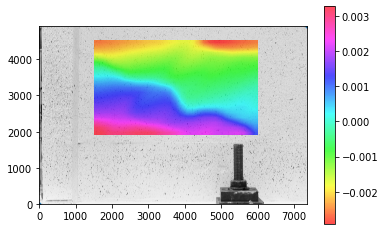

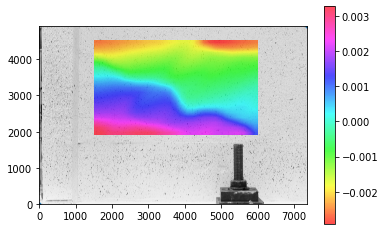

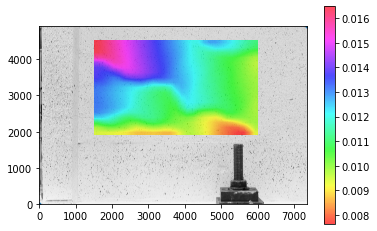

In [8]:
ppobj = PostProcessing(analysis_obj=anaobj)
ppobj.visualization(results='e11', step=1, smooth=True)
ppobj.visualization(results='e21', step=1, smooth=True)
ppobj.visualization(results='e22', step=1, smooth=True)